In [5]:
import random
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

np.random.seed(42)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [6]:
kf = KFold(n_splits=5, shuffle=True)
model_gb = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)
scores = cross_val_score(model_gb, x_data_values, y_data_values, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Cross-validation scores: [0.98387097 0.97171717 0.95757576 0.96565657 0.96969697]
Mean accuracy: 0.96970348647768


In [8]:
kf3 = KFold(n_splits=3, shuffle=True)
model_gb3 = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)
scores3 = cross_val_score(model_gb3, x_data_values, y_data_values, cv=kf3, scoring='accuracy')

print("Cross-validation scores:", scores3)
print("Mean accuracy:", scores3.mean())

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores: [0.95157385 0.96121212 0.94909091]
Mean accuracy: 0.9539589600606551


In [9]:
kf10 = KFold(n_splits=10, shuffle=True)
model_gb10 = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)
scores10 = cross_val_score(model_gb10, x_data_values, y_data_values, cv=kf10, scoring='accuracy')

print("Cross-validation scores:", scores10)
print("Mean accuracy:", scores10.mean())

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Cross-validation scores: [0.97580645 0.98790323 0.97983871 0.96774194 0.96774194 0.97580645
 0.98380567 0.99190283 0.97165992 0.97975709]
Mean accuracy: 0.9781964215750294


In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)

with open('models/gb_model.pkl', 'rb') as f:
    gb_clf = pickle.load(f)

y_pred = gb_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.9858870967741935

In [7]:
accuracy_score(y_train, gb_clf.predict(x_train))

0.9868686868686869

In [8]:
r = 10

print("Accuracy:", round(accuracy_score(y_test, y_pred),r))
print("Precision:", round(precision_score(y_test, y_pred),r))
print("Recall:", round(recall_score(y_test, y_pred),r))
print("F1-Score:", round(f1_score(y_test, y_pred),r))
print(classification_report(y_test, y_pred))

Accuracy: 0.9858870968
Precision: 0.9924242424
Recall: 0.9812734082
F1-Score: 0.9868173258
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       229
           1       0.99      0.98      0.99       267

    accuracy                           0.99       496
   macro avg       0.99      0.99      0.99       496
weighted avg       0.99      0.99      0.99       496



Confusion Matrix:
[[227   2]
 [  5 262]]


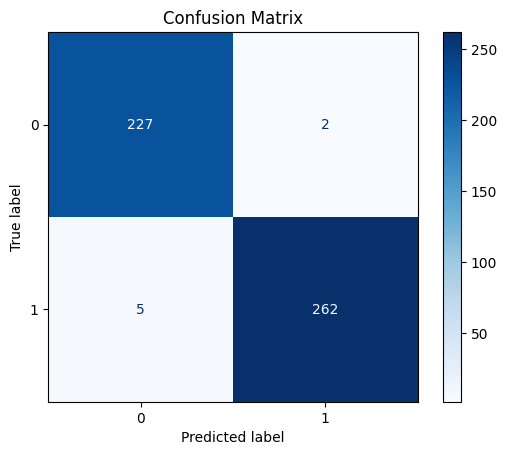

In [9]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()